<h1 style ="text-align:center">CAR SALE REPORT</h1>
<img src="image\intro_Pic.png" style="height: 400px; width:100%; algin-content:center">

<h2> Introduction</h2>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
 

In [3]:
data = pd.read_csv("Car Sales.xlsx - car_data.csv")

In [4]:
data

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


<h2>Information about the Dataset</h2>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


<h2>Descriptive statistics</h2>
<h3>Gender</h3>

In [6]:
count_Gender  = data['Gender'].value_counts().reset_index()
count_Gender['percent'] = round((count_Gender['count']/len(data['Gender']))*100,2)
count_Gender

,Gender,count,percent
0,Male,18798,78.63
1,Female,5108,21.37


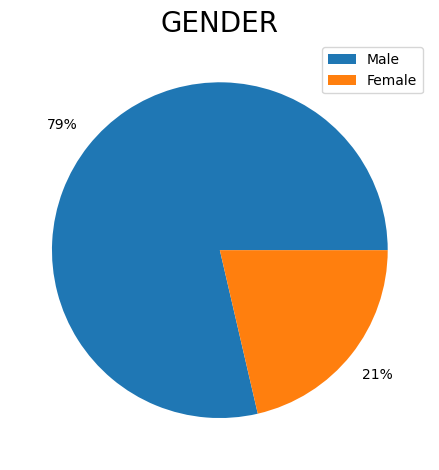

In [7]:
plt.pie(count_Gender['percent'], autopct='%1.0f%%', pctdistance=1.2, labeldistance=1.2)
plt.title("GENDER", size= 20)
plt.legend(count_Gender['Gender'])
plt.tight_layout()
plt.show()

<h5>--> Conclusion:</h5> <p>Based on the chart above, we can see that the number of customers coming to the car store is mainly male.

<h3>WHICH IS THE FIVE MOST SELLING CAR BRAND IN THE STORE?</h3>

In [8]:
car_Brand =data['Company'].value_counts().reset_index()
car_Brand_Top_5 = car_Brand[0:6].sort_values(ascending =True, by='count')
car_Brand_Top_5

,Company,count
5,Mitsubishi,1277
4,Mercedes-B,1285
3,Volkswagen,1333
2,Ford,1614
1,Dodge,1671
0,Chevrolet,1819


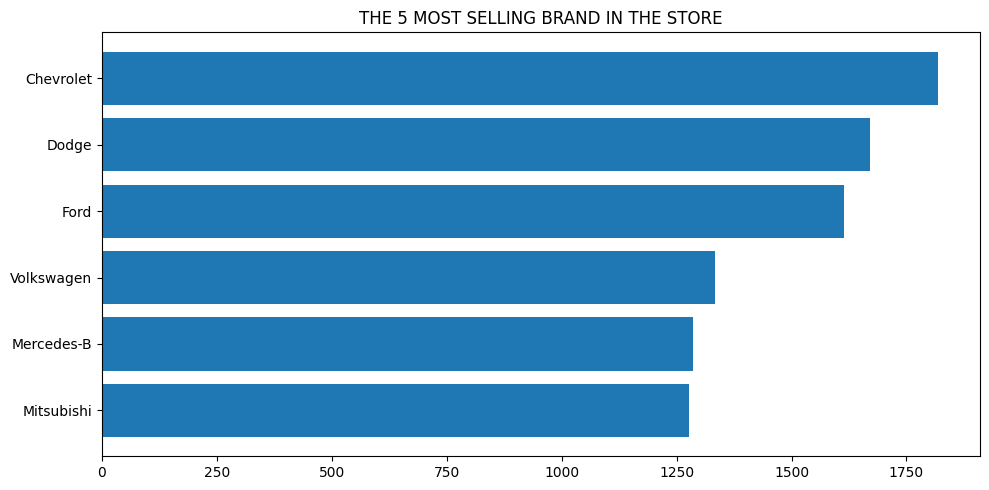

In [9]:
plt.figure(figsize=(10,5))
plt.barh(car_Brand_Top_5['Company'], car_Brand_Top_5['count'])
plt.title("THE 5 MOST SELLING BRAND IN THE STORE")
plt.tight_layout()
plt.show()

<h5>--> Conclusion:</h5> <p>Based on the chart above, we can see that the number of customers coming to the car store is mainly male.

<h2>How will revenue from car sales change over the months of 2022 and 2023?</h2>

In [10]:
date_Price = data[['Date','Price ($)']]
date_Price['month'] = pd.DatetimeIndex(date_Price['Date']).month
date_Price['year'] = pd.DatetimeIndex(date_Price['Date']).year
date_Price

C:\Users\mynam\AppData\Local\Temp\ipykernel_7840\3443998874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_Price['month'] = pd.DatetimeIndex(date_Price['Date']).month
C:\Users\mynam\AppData\Local\Temp\ipykernel_7840\3443998874.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_Price['year'] = pd.DatetimeIndex(date_Price['Date']).year


,Date,Price ($),month,year
0,1/2/2022,26000,1,2022
1,1/2/2022,19000,1,2022
2,1/2/2022,31500,1,2022
3,1/2/2022,14000,1,2022
4,1/2/2022,24500,1,2022
...,...,...,...,...
23901,12/31/2023,12000,12,2023
23902,12/31/2023,16000,12,2023
23903,12/31/2023,21000,12,2023
23904,12/31/2023,31000,12,2023


In [11]:
date_Price_Month_Year = date_Price[['month','Price ($)','year']].groupby(by=['year','month']).sum().reset_index()


In [12]:
date_Price_Month_2023 = date_Price_Month_Year[date_Price_Month_Year['year']==2023]
date_Price_Month_2022 = date_Price_Month_Year[date_Price_Month_Year['year']==2022]
date_Price_Month_2023 

,year,month,Price ($)
12,2023,1,12764298
13,2023,2,11848580
14,2023,3,22203814
15,2023,4,24115567
16,2023,5,32613157
17,2023,6,28901691
18,2023,7,28243030
19,2023,8,25162276
20,2023,9,51416962
21,2023,10,28043756


In [13]:
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

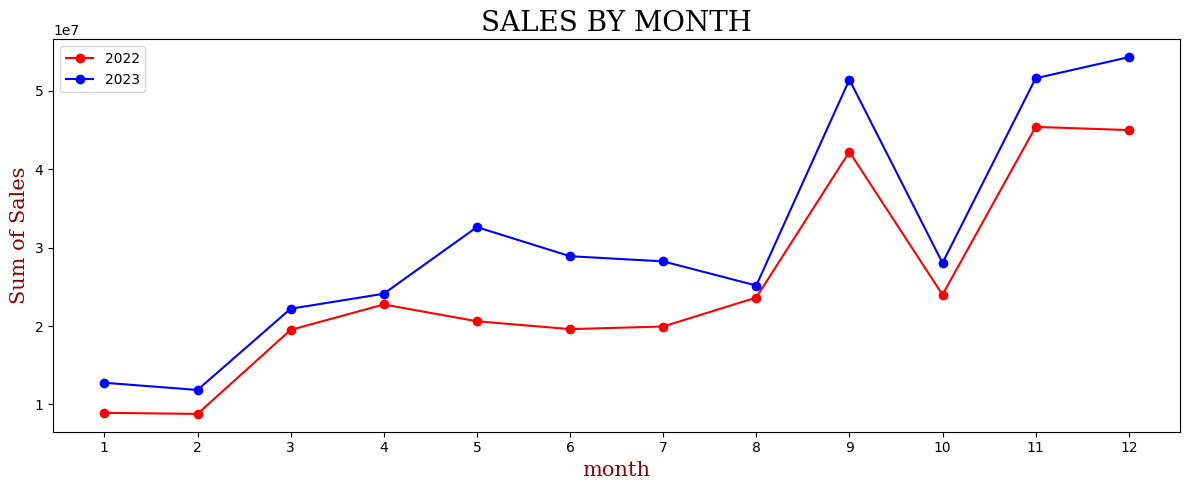

In [27]:
plt.figure(figsize=(12,5))

plt.plot('month', "Price ($)", data = date_Price_Month_2022, marker = "o" , color = 'red')
plt.plot('month', "Price ($)", data = date_Price_Month_2023, marker = "o" , color = 'blue')
plt.xticks(date_Price_Month_2023['month'], [x+1 for x in range(12)])

plt.legend(['2022','2023'])
plt.title("SALES BY MONTH", fontdict = font1, color = 'black')
plt.xlabel("month", fontdict= font2)
plt.ylabel("Sum of Sales", fontdict= font2)
plt.tight_layout()
plt.show()

<h5>--> Conclusion:</h5> <p>Based on the chart above, it can be seen that the total amount of sales in 2022 is much smaller than in 2023.<br>
Revenue from car sales mainly increased sharply at the end of the year and at the beginning of the year revenue will be low from the above Dealers</p>

In [15]:
annualIncome_Vs_Price = data[['Annual Income','Price ($)']].sort_values(by= 'Annual Income')
annualIncome_Vs_Price['annualIncome'] = annualIncome_Vs_Price['Annual Income']/1000
annualIncome_Vs_Price['Price'] = annualIncome_Vs_Price['Price ($)']/1000
annualIncome_Vs_Price

,Annual Income,Price ($),annualIncome,Price
23451,10080,22801,10.08,22.801
0,13500,26000,13.50,26.000
21222,13500,53000,13.50,53.000
8913,13500,17001,13.50,17.001
8911,13500,22001,13.50,22.001
...,...,...,...,...
22407,6600000,39000,6600.00,39.000
9996,6800000,15000,6800.00,15.000
6150,7650000,21000,7650.00,21.000
15675,8000000,85000,8000.00,85.000


<h2>Is there a relationship between car selling price and customer income?</h2>

In [16]:
cheapest_Car_AnnualIncome = data[data['Price ($)']==max(data['Price ($)'])]
cheapest_Car_AnnualIncome

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
7068,C_CND_007069,10/20/2022,Dariel,Male,1388000,Star Enterprises Inc,Cadillac,Eldorado,Overhead Camshaft,Manual,Black,85800,99301-3882,Passenger,6544024,Aurora


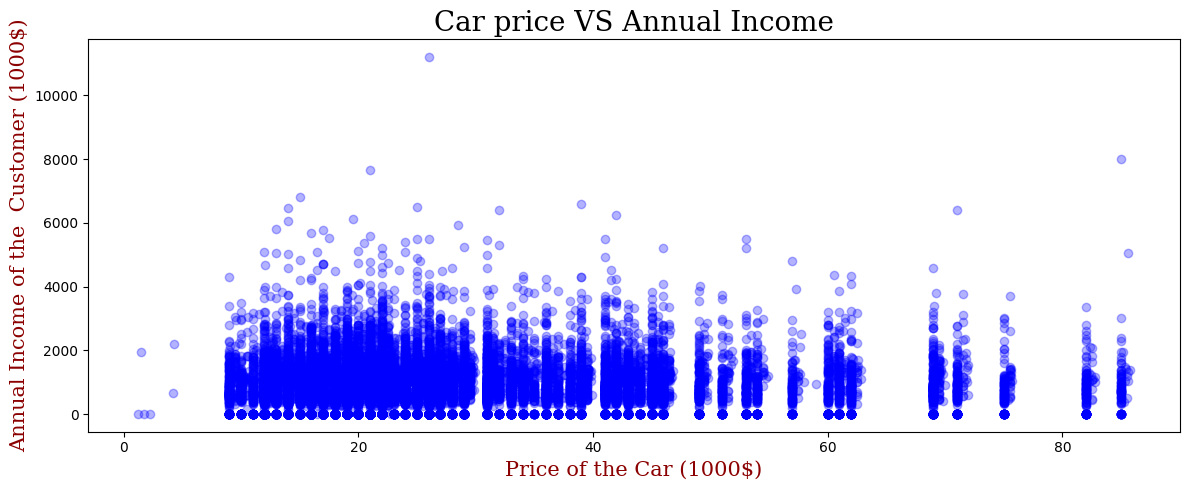

In [25]:
plt.figure(figsize=(12,5))
plt.scatter(annualIncome_Vs_Price['Price'],annualIncome_Vs_Price['annualIncome'], color='blue', alpha=0.3)
plt.title("Car price VS Annual Income", fontdict = font1, color = 'black')
plt.xlabel("Price of the Car (1000$)", fontdict=font2)
plt.ylabel("Annual Income of the  Customer (1000$)", fontdict=font2)
plt.tight_layout()
plt.show()